<a href="https://colab.research.google.com/github/lianmega/PVCK_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lian Mega Pratiwi - 2041720257

Praktikum

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Buat Gamma Correction

Gamma correction pada citra
--------------------------------
Masukan nilai gamma: 3


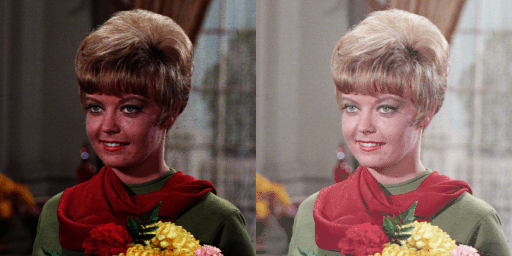

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Gamma correction pada citra')
print('--------------------------------')
try :
  gamma = int(input('Masukan nilai gamma: '))
except ValueError:
  print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/female (1).png')
gamma_correct = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      gamma_correct[y,x,c] = np.clip(255 * pow((image[y, x, c]) / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((image, gamma_correct))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

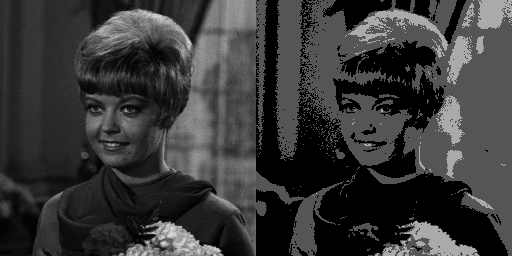

In [ ]:
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
image = cv.imread('/content/drive/MyDrive/female (1).png', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    depth_image[y, x] = np.clip(round(image[y, x] / level) * level, 0, 255)

final_frame = cv.hconcat((image, depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

In [12]:
# Import Library
import glob
from math import sqrt, log10

# Read Image
image = cv.imread('/content/drive/MyDrive/galaxy.PNG')

# Masukkan Image ke Array
cv_img = []
for img in glob.glob('/content/drive/MyDrive/galaxy.PNG'):
 n = cv.imread(img)
 cv_img.append(n)

Jumlah citra di average 5

In [16]:
# Jumlah Citra
# Ubah sesuai keperluan
jml_citra = 5

noise_image = cv_img[jml_citra - 1]

for i in range(jml_citra):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

# img1 = original image
# img2 = denoise image yg sudah dirata-ratakan

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    # MSE 0 = tidak ada noise
    # PSNR tidak berarti jika MSE 0
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

mse = np.mean((image - noise_image) ** 2)
psnr = PSNR(image, noise_image)

print('Jumlah Citra =', jml_citra)
print('Nilai PSNR =', psnr, 'dB' )
print('Nilai MSE =', mse)

final_frame = cv.hconcat((image, noise_image))
cv2_imshow(final_frame)

IndexError: ignored

Tugas kelompok

Kelompok 2 ambil bagian TTL dan Jenis Kelamin.

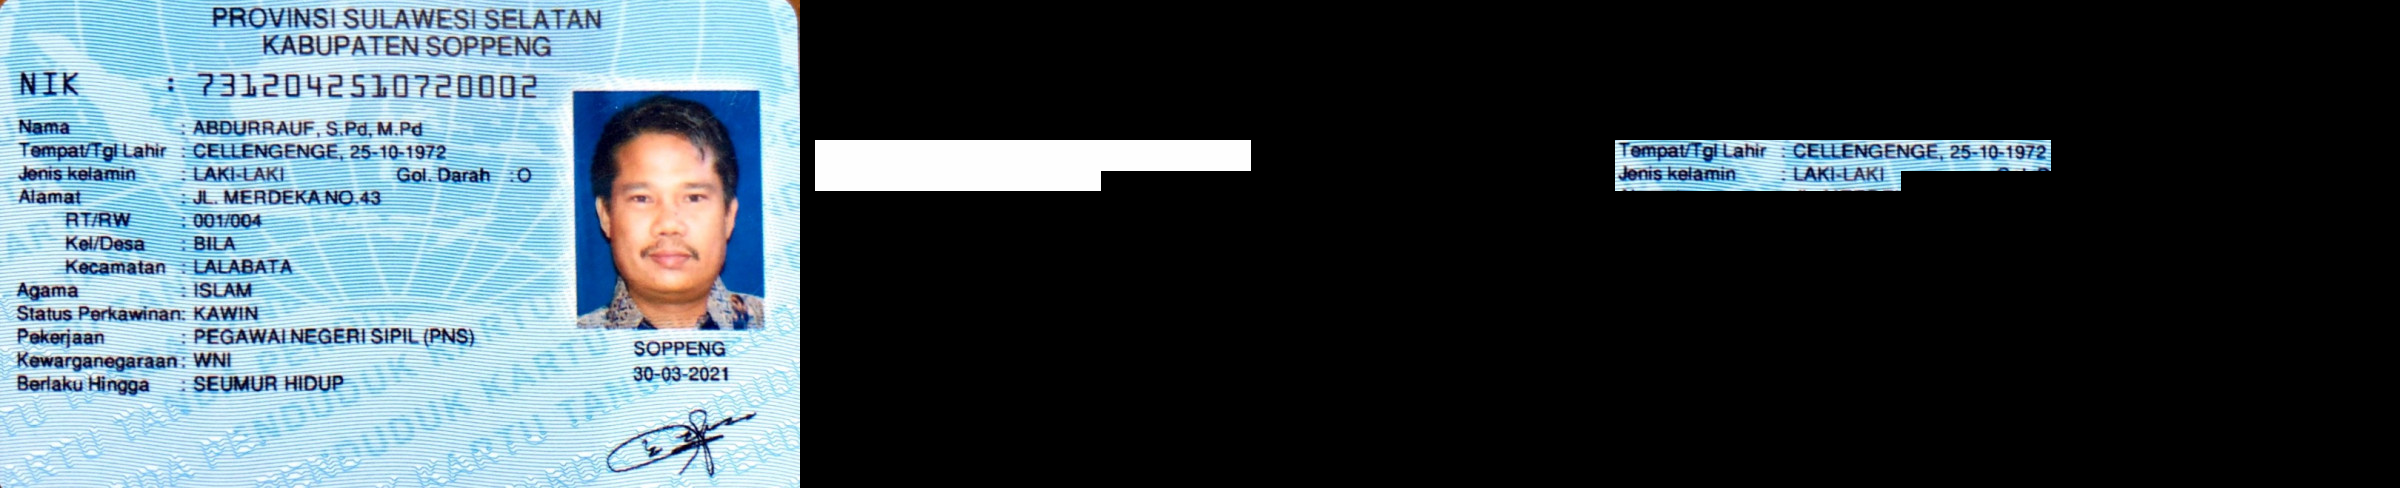

In [44]:
img = cv.imread('/content/drive/MyDrive/KTP.jpeg')

mask = np.zeros(img.shape, img.dtype)
mask = cv.rectangle(mask,pt1=(450,170),pt2=(15,140),color=(255,255,255),thickness=-1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.rectangle(mask,pt1=(300,190),pt2=(15,160),color=(255,255,255),thickness=-1)

result = img & mask & mask2
mask = mask + mask2
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)
